# Import Libraries

In [1]:
# Import necessary libraries
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# %%
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn import set_config

In [2]:
import seaborn as sns

# Import data

In [3]:
# Load train data
data =pd.read_csv('train.csv')


In [4]:
data.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,4.0,3b178aa59-5.jpg,Terrier
1,Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",3.0,2fbf2cb7c-1.jpg,Mixed_Breed
2,Dog,1.0,Male,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,Puppy's age is unknown. My husband went mounta...,1.0,97f683e04-1.jpg,Mixed_Breed
3,Dog,3.0,Male,Black,Unknown,Unknown,Medium,Yes,Unknown,Yes,Unknown,Healthy,0.0,"Hi, I'm Randy, few weeks ago I got beaten by h...",4.0,479500716-2.jpg,Mixed_Breed
4,Dog,8.0,Male,Brown,Unknown,Unknown,Large,Yes,Yes,Yes,No,Healthy,0.0,"Abandoned puppy looking for a home. Hi, he is ...",3.0,4a2270c3e-4.jpg,Mixed_Breed


In [5]:
# take first 1000 data to reduce time
N = 1000
data = data[:N]

In [6]:
data.shape 

(1000, 17)

In [7]:
# here 'AdoptionSpeed' is our target variable and rest of variable is independent variable
X= data.drop(['AdoptionSpeed'], axis=1) # drop AdoptionSpeed column
y = data['AdoptionSpeed']

X.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,3b178aa59-5.jpg,Terrier
1,Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",2fbf2cb7c-1.jpg,Mixed_Breed
2,Dog,1.0,Male,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,Puppy's age is unknown. My husband went mounta...,97f683e04-1.jpg,Mixed_Breed
3,Dog,3.0,Male,Black,Unknown,Unknown,Medium,Yes,Unknown,Yes,Unknown,Healthy,0.0,"Hi, I'm Randy, few weeks ago I got beaten by h...",479500716-2.jpg,Mixed_Breed
4,Dog,8.0,Male,Brown,Unknown,Unknown,Large,Yes,Yes,Yes,No,Healthy,0.0,"Abandoned puppy looking for a home. Hi, he is ...",4a2270c3e-4.jpg,Mixed_Breed


In [8]:
# load test data
test = pd.read_csv('test.csv')

test.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",5df99d229-2.jpg,Domestic_Short_Hair
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",a08030c6f-2.jpg,Mixed_Breed
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,c8c3eb092-1.jpg,Mixed_Breed
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",56e91b142-1.jpg,Mixed_Breed
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,094636517-1.jpg,Domestic_Short_Hair


In [9]:
test.shape

(500, 16)

In [10]:
# data type
data.dtypes

Type              object
Age              float64
Gender            object
Color1            object
Color2            object
Color3            object
MaturitySize      object
FurLength         object
Vaccinated        object
Dewormed          object
Sterilized        object
Health            object
Fee              float64
Description       object
AdoptionSpeed    float64
Images            object
Breed             object
dtype: object

In [11]:
data.isna() # check nan value

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# lets check train dataset is there any null value or not

data.isnull().sum()

Type             0
Age              0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Fee              0
Description      0
AdoptionSpeed    0
Images           0
Breed            0
dtype: int64

In [13]:
# lets check test dataset is there any null value or not

test.isnull().sum()

Type            0
Age             0
Gender          0
Color1          0
Color2          0
Color3          0
MaturitySize    0
FurLength       0
Vaccinated      0
Dewormed        0
Sterilized      0
Health          0
Fee             0
Description     0
Images          0
Breed           0
dtype: int64

In [14]:
# lets check test dataset is there any nan value or not

test.isna().sum()

Type            0
Age             0
Gender          0
Color1          0
Color2          0
Color3          0
MaturitySize    0
FurLength       0
Vaccinated      0
Dewormed        0
Sterilized      0
Health          0
Fee             0
Description     0
Images          0
Breed           0
dtype: int64

In [15]:
# lets check train dataset is there any nan value or not

data.isna().sum()

Type             0
Age              0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Fee              0
Description      0
AdoptionSpeed    0
Images           0
Breed            0
dtype: int64

#### SO IN OUR DATA SET DOESN'T HAVE ANY NULL AND NAN VALUE  👌😄

In [138]:
data.corr() # corealation for tarin data

,Age,Fee,AdoptionSpeed
Age,1.000000,0.092533,0.113588
Fee,0.092533,1.000000,-0.034676
AdoptionSpeed,0.113588,-0.034676,1.000000


<AxesSubplot:>

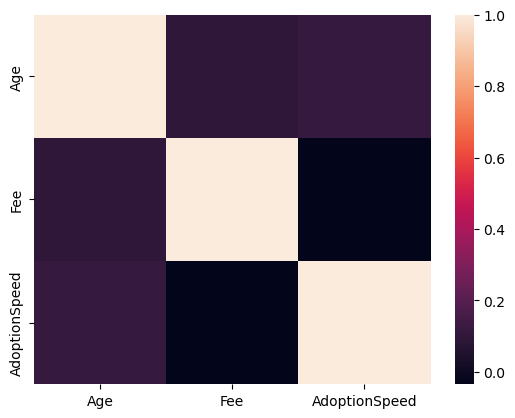

In [137]:
import seaborn as sns # corealation with visualize 

sns.heatmap(data.corr())

In [139]:
test.corr() # corelation for test data

,Age,Fee
Age,1.000000,0.226283
Fee,0.226283,1.000000


<AxesSubplot:>

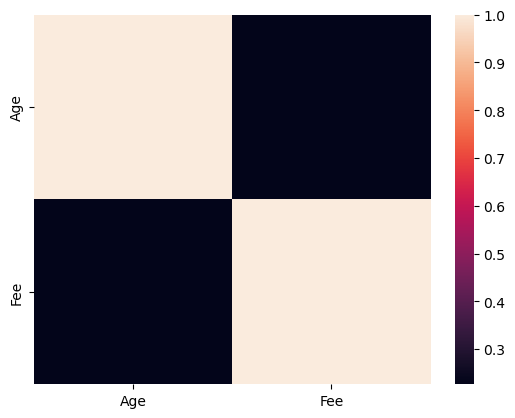

In [136]:
sns.heatmap(test.corr()) # visualize corealaion of test data

In [16]:
# make group data by category 
cat_cols = ['Type', 'Gender','Color1', 'Color2', 'Color3', 
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Breed'] 
num_cols = ['Age', 'Fee']
txt_cols = ['Description']
img_cols = ['Images']


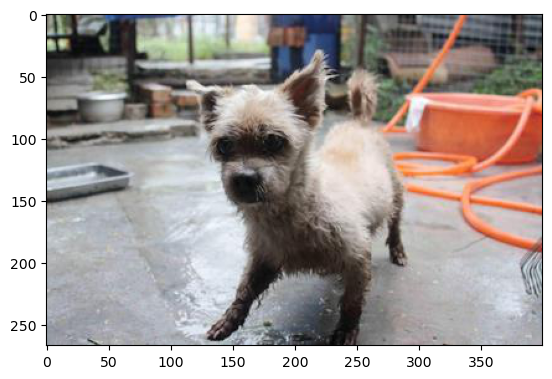

In [18]:
# load images 
from skimage import io


img_dir = "train_images1/" # used 1st set of image
X['Images'] = [img_dir+img for img in data['Images']]

# Read the first image of the list
img = io.imread(X['Images'][0])
# have a look to the image
plt.imshow(img)

In [19]:
len(X['Images']) # check length of image data

1000

In [20]:

!pip install opencv-python

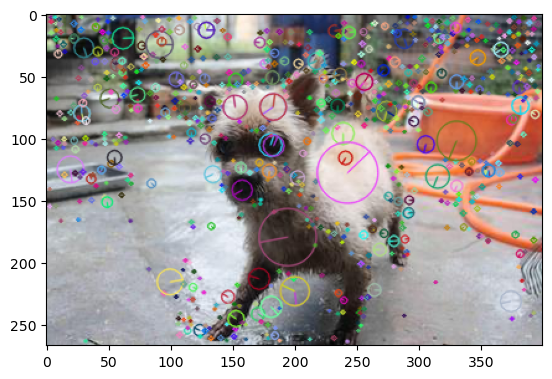

In [21]:
 
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # convert the image to grey levels

# compute SIFT detector and descriptors
sift = cv2.SIFT_create() # used to extract keypoints and descriptors from an image.
kp,des = sift.detectAndCompute(gray,None) # detects keypoints and computes their descriptors from image.

# plot image and descriptors
cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

## Extract features and build BOFs

In [22]:
# First step, extract the SIFTs of each image

def extract_SIFT(img_lst):
    nbSIFTs = 0    # Nomber of SIFTs
    SIFTs = []  # List of SIFTs descriptors 
    
    for pathImg in tqdm(img_lst, position=0, leave=True): 
        img = io.imread(pathImg) # read image
        if len(img.shape)==2: # this is a grey level image
            gray = img
        else: # we expect the image to be a RGB image or RGBA
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create() # extract keypoints and descriptors from an image.
        kp, des = sift.detectAndCompute(gray, None) #  detects keypoints and computes their descriptors from image.
        if len(kp) == 0 and img.shape[2]==4: #some images are mask on alpha channel: we thus extract this channel if not kpts have been detected
            gray = img[:,:,3]
            sift = cv2.SIFT_create()
            kp, des = sift.detectAndCompute(gray, None)
        
        nbSIFTs += des.shape[0]
        SIFTs.append(des)
        #dimImgs.append(des.shape[0])
    return nbSIFTs, SIFTs#, dimImgs

In [23]:
nbSIFTs, SIFTs = extract_SIFT(X['Images']) # check the number of SIFT features extracted from all the images
print('nbSifts: ', nbSIFTs) 


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.21it/s]

nbSifts:  667406


In [24]:
# Step 2: clusterize the SIFT
from sklearn.cluster import MiniBatchKMeans
# performs clustering on SIFT descriptors using the MiniBatchKMeans algorithm he goal of 
#clustering is to group similar descriptors together and reduce the dimensionality of the feature space.

def clusterize(SIFTs, nb_img_features=5, verbose=False):
    clusterizer = MiniBatchKMeans(n_clusters=nb_img_features)   # nb_img_features is a hyperparameter
    # learning of the clustering
    flat_list = SIFTs[0]
    for des in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, des)) # concate
        if verbose:
            print("shape:", des.shape, flat_list.shape)
    clusterizer.fit(flat_list)
    # we now know the label of each SIFT descriptor
    return clusterizer


In [25]:
clusterizer = clusterize(SIFTs, verbose=True)

shape: (257, 128) (1158, 128)
shape: (315, 128) (1473, 128)
shape: (497, 128) (1970, 128)
shape: (1311, 128) (3281, 128)
shape: (563, 128) (3844, 128)
shape: (993, 128) (4837, 128)
shape: (721, 128) (5558, 128)
shape: (1332, 128) (6890, 128)
shape: (219, 128) (7109, 128)
shape: (775, 128) (7884, 128)
shape: (323, 128) (8207, 128)
shape: (738, 128) (8945, 128)
shape: (175, 128) (9120, 128)
shape: (291, 128) (9411, 128)
shape: (630, 128) (10041, 128)
shape: (288, 128) (10329, 128)
shape: (545, 128) (10874, 128)
shape: (146, 128) (11020, 128)
shape: (362, 128) (11382, 128)
shape: (1666, 128) (13048, 128)
shape: (1020, 128) (14068, 128)
shape: (639, 128) (14707, 128)
shape: (230, 128) (14937, 128)
shape: (994, 128) (15931, 128)
shape: (643, 128) (16574, 128)
shape: (522, 128) (17096, 128)
shape: (795, 128) (17891, 128)
shape: (490, 128) (18381, 128)
shape: (125, 128) (18506, 128)
shape: (730, 128) (19236, 128)
shape: (1554, 128) (20790, 128)
shape: (549, 128) (21339, 128)
shape: (1296, 128

shape: (550, 128) (176203, 128)
shape: (232, 128) (176435, 128)
shape: (214, 128) (176649, 128)
shape: (171, 128) (176820, 128)
shape: (881, 128) (177701, 128)
shape: (188, 128) (177889, 128)
shape: (758, 128) (178647, 128)
shape: (297, 128) (178944, 128)
shape: (386, 128) (179330, 128)
shape: (893, 128) (180223, 128)
shape: (1001, 128) (181224, 128)
shape: (1405, 128) (182629, 128)
shape: (872, 128) (183501, 128)
shape: (1516, 128) (185017, 128)
shape: (601, 128) (185618, 128)
shape: (559, 128) (186177, 128)
shape: (793, 128) (186970, 128)
shape: (259, 128) (187229, 128)
shape: (248, 128) (187477, 128)
shape: (897, 128) (188374, 128)
shape: (190, 128) (188564, 128)
shape: (187, 128) (188751, 128)
shape: (136, 128) (188887, 128)
shape: (120, 128) (189007, 128)
shape: (788, 128) (189795, 128)
shape: (162, 128) (189957, 128)
shape: (306, 128) (190263, 128)
shape: (390, 128) (190653, 128)
shape: (188, 128) (190841, 128)
shape: (1158, 128) (191999, 128)
shape: (316, 128) (192315, 128)
shap

shape: (982, 128) (340011, 128)
shape: (479, 128) (340490, 128)
shape: (881, 128) (341371, 128)
shape: (745, 128) (342116, 128)
shape: (689, 128) (342805, 128)
shape: (594, 128) (343399, 128)
shape: (1445, 128) (344844, 128)
shape: (377, 128) (345221, 128)
shape: (227, 128) (345448, 128)
shape: (884, 128) (346332, 128)
shape: (207, 128) (346539, 128)
shape: (676, 128) (347215, 128)
shape: (1321, 128) (348536, 128)
shape: (637, 128) (349173, 128)
shape: (1227, 128) (350400, 128)
shape: (260, 128) (350660, 128)
shape: (509, 128) (351169, 128)
shape: (729, 128) (351898, 128)
shape: (421, 128) (352319, 128)
shape: (286, 128) (352605, 128)
shape: (408, 128) (353013, 128)
shape: (828, 128) (353841, 128)
shape: (661, 128) (354502, 128)
shape: (1065, 128) (355567, 128)
shape: (259, 128) (355826, 128)
shape: (217, 128) (356043, 128)
shape: (910, 128) (356953, 128)
shape: (715, 128) (357668, 128)
shape: (1140, 128) (358808, 128)
shape: (1343, 128) (360151, 128)
shape: (539, 128) (360690, 128)
sh

shape: (575, 128) (522092, 128)
shape: (792, 128) (522884, 128)
shape: (522, 128) (523406, 128)
shape: (737, 128) (524143, 128)
shape: (453, 128) (524596, 128)
shape: (329, 128) (524925, 128)
shape: (397, 128) (525322, 128)
shape: (168, 128) (525490, 128)
shape: (364, 128) (525854, 128)
shape: (1276, 128) (527130, 128)
shape: (294, 128) (527424, 128)
shape: (406, 128) (527830, 128)
shape: (1255, 128) (529085, 128)
shape: (790, 128) (529875, 128)
shape: (1059, 128) (530934, 128)
shape: (280, 128) (531214, 128)
shape: (693, 128) (531907, 128)
shape: (302, 128) (532209, 128)
shape: (268, 128) (532477, 128)
shape: (1423, 128) (533900, 128)
shape: (150, 128) (534050, 128)
shape: (1662, 128) (535712, 128)
shape: (926, 128) (536638, 128)
shape: (706, 128) (537344, 128)
shape: (389, 128) (537733, 128)
shape: (1193, 128) (538926, 128)
shape: (501, 128) (539427, 128)
shape: (1014, 128) (540441, 128)
shape: (1051, 128) (541492, 128)
shape: (942, 128) (542434, 128)
shape: (646, 128) (543080, 128)


In [26]:
clusterizer.get_params

<bound method BaseEstimator.get_params of MiniBatchKMeans(n_clusters=5)>

In [27]:
# Step 3: build the BOW representation of each images (i.e. construction of the BOFs)

def build_BOFs(SIFTs, clusterizer, verbose=False):
    ok, nok = 0, 0
    #BOF initialization
    nb_img_features = clusterizer.get_params()['n_clusters']# Get the number of clusters from the KMeans clusterizer
    BOFs = np.empty(shape=(0, nb_img_features), dtype=int) #Initialize an empty numpy array with the appropriate shape and dtype for the BOFs

    # Build label list
    flat_list = SIFTs[0]
    # Iterate over the remaining images in the dataset and concatenate their SIFT features into flat_list
    for des in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, des))
        if verbose:
            print("shape:", des.shape, flat_list.shape)
    labels = clusterizer.predict(flat_list)#Use the clusterizer to predict the cluster labels for each SIFT feature in flat_list

    # loop on images
    i = 0 # index for the loop on SIFTs
    for des in SIFTs:
        #initialisation of the bof for the current image
        tmpBof = np.array([0]*nb_img_features)
        j = 0
        # for every SIFT of the current image:
        nbs = des.shape[0]
        while j < nbs:
            tmpBof[labels[i]] += 1
            j+=1
            i+=1
        BOFs = np.concatenate((BOFs, tmpBof.reshape(1,-1)), axis=0)
    if verbose:
        print("BOFs : ", BOFs)
    
    return BOFs


In [28]:
BOFs = build_BOFs(SIFTs, clusterizer, verbose=True)
BOFs.shape

shape: (257, 128) (1158, 128)
shape: (315, 128) (1473, 128)
shape: (497, 128) (1970, 128)
shape: (1311, 128) (3281, 128)
shape: (563, 128) (3844, 128)
shape: (993, 128) (4837, 128)
shape: (721, 128) (5558, 128)
shape: (1332, 128) (6890, 128)
shape: (219, 128) (7109, 128)
shape: (775, 128) (7884, 128)
shape: (323, 128) (8207, 128)
shape: (738, 128) (8945, 128)
shape: (175, 128) (9120, 128)
shape: (291, 128) (9411, 128)
shape: (630, 128) (10041, 128)
shape: (288, 128) (10329, 128)
shape: (545, 128) (10874, 128)
shape: (146, 128) (11020, 128)
shape: (362, 128) (11382, 128)
shape: (1666, 128) (13048, 128)
shape: (1020, 128) (14068, 128)
shape: (639, 128) (14707, 128)
shape: (230, 128) (14937, 128)
shape: (994, 128) (15931, 128)
shape: (643, 128) (16574, 128)
shape: (522, 128) (17096, 128)
shape: (795, 128) (17891, 128)
shape: (490, 128) (18381, 128)
shape: (125, 128) (18506, 128)
shape: (730, 128) (19236, 128)
shape: (1554, 128) (20790, 128)
shape: (549, 128) (21339, 128)
shape: (1296, 128

shape: (214, 128) (176649, 128)
shape: (171, 128) (176820, 128)
shape: (881, 128) (177701, 128)
shape: (188, 128) (177889, 128)
shape: (758, 128) (178647, 128)
shape: (297, 128) (178944, 128)
shape: (386, 128) (179330, 128)
shape: (893, 128) (180223, 128)
shape: (1001, 128) (181224, 128)
shape: (1405, 128) (182629, 128)
shape: (872, 128) (183501, 128)
shape: (1516, 128) (185017, 128)
shape: (601, 128) (185618, 128)
shape: (559, 128) (186177, 128)
shape: (793, 128) (186970, 128)
shape: (259, 128) (187229, 128)
shape: (248, 128) (187477, 128)
shape: (897, 128) (188374, 128)
shape: (190, 128) (188564, 128)
shape: (187, 128) (188751, 128)
shape: (136, 128) (188887, 128)
shape: (120, 128) (189007, 128)
shape: (788, 128) (189795, 128)
shape: (162, 128) (189957, 128)
shape: (306, 128) (190263, 128)
shape: (390, 128) (190653, 128)
shape: (188, 128) (190841, 128)
shape: (1158, 128) (191999, 128)
shape: (316, 128) (192315, 128)
shape: (888, 128) (193203, 128)
shape: (488, 128) (193691, 128)
shap

shape: (479, 128) (340490, 128)
shape: (881, 128) (341371, 128)
shape: (745, 128) (342116, 128)
shape: (689, 128) (342805, 128)
shape: (594, 128) (343399, 128)
shape: (1445, 128) (344844, 128)
shape: (377, 128) (345221, 128)
shape: (227, 128) (345448, 128)
shape: (884, 128) (346332, 128)
shape: (207, 128) (346539, 128)
shape: (676, 128) (347215, 128)
shape: (1321, 128) (348536, 128)
shape: (637, 128) (349173, 128)
shape: (1227, 128) (350400, 128)
shape: (260, 128) (350660, 128)
shape: (509, 128) (351169, 128)
shape: (729, 128) (351898, 128)
shape: (421, 128) (352319, 128)
shape: (286, 128) (352605, 128)
shape: (408, 128) (353013, 128)
shape: (828, 128) (353841, 128)
shape: (661, 128) (354502, 128)
shape: (1065, 128) (355567, 128)
shape: (259, 128) (355826, 128)
shape: (217, 128) (356043, 128)
shape: (910, 128) (356953, 128)
shape: (715, 128) (357668, 128)
shape: (1140, 128) (358808, 128)
shape: (1343, 128) (360151, 128)
shape: (539, 128) (360690, 128)
shape: (590, 128) (361280, 128)
sh

shape: (575, 128) (522092, 128)
shape: (792, 128) (522884, 128)
shape: (522, 128) (523406, 128)
shape: (737, 128) (524143, 128)
shape: (453, 128) (524596, 128)
shape: (329, 128) (524925, 128)
shape: (397, 128) (525322, 128)
shape: (168, 128) (525490, 128)
shape: (364, 128) (525854, 128)
shape: (1276, 128) (527130, 128)
shape: (294, 128) (527424, 128)
shape: (406, 128) (527830, 128)
shape: (1255, 128) (529085, 128)
shape: (790, 128) (529875, 128)
shape: (1059, 128) (530934, 128)
shape: (280, 128) (531214, 128)
shape: (693, 128) (531907, 128)
shape: (302, 128) (532209, 128)
shape: (268, 128) (532477, 128)
shape: (1423, 128) (533900, 128)
shape: (150, 128) (534050, 128)
shape: (1662, 128) (535712, 128)
shape: (926, 128) (536638, 128)
shape: (706, 128) (537344, 128)
shape: (389, 128) (537733, 128)
shape: (1193, 128) (538926, 128)
shape: (501, 128) (539427, 128)
shape: (1014, 128) (540441, 128)
shape: (1051, 128) (541492, 128)
shape: (942, 128) (542434, 128)
shape: (646, 128) (543080, 128)


(1000, 5)

In [29]:
from sklearn.base import BaseEstimator,TransformerMixin

In [30]:
def list_comparaison(l1, l2): # in this function l1 and l2 should be not none and same length 
    if not l1 is None \
        and not l2 is None \
        and len(l1)==len(l2) \
        and len(l1)==sum([1 for i,j in zip(l1, l2) if i==j]):#the function uses the zip() function to iterate over both lists 
             # simultaneously checks whether the corresponding elements in both lists match or not. If they match, it increments a counter variable.
            # If the number of matching elements is equal to the length of the lists, then the function returns True, otherwise False.
        return True
    return False

In [31]:

# lets extract SIFT descriptors from images and build Bag-Of-Features histograms from these descriptors. BOF is a method for 
# representing an image as a histogram of visual word occurrences.
class BOF_extractor(BaseEstimator,TransformerMixin): 
    X = None
    SIFTs = None
    nbSIFTs = 0
    
    #initializes the class instance with a number of image features to use in clustering and a verbosity flag (verbose) to enable/disable debugging output.
    def __init__(self, nb_img_features=10, verbose=False):
        self.nb_img_features = nb_img_features
        self.verbose = verbose

        if self.verbose:
            print("BOF.init()")
      # his method extracts SIFT descriptors from the images in X, clusters the descriptors using the clusterize function, and stores the resulting clusterizer object.  
    def fit(self, X, y=None):
        if self.verbose:
            print("BOF.fit()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
    
    
    # now transform the input features into a new representation based on the Bag-of-Features (BoF) technique
    def transform(self, X, y=None):
        if self.verbose:
            print("BOF.transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)

        if self.verbose:
            print("nbSIFTs:", nbSIFTs)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)
    
    def fit_transform(self, X, y=None):
        if self.verbose:
            print("BOF.fit_transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)


In [32]:
test_BOF_extractor = BOF_extractor(nb_img_features=5, verbose=True)

BOF.init()


In [33]:
BOFs = test_BOF_extractor.fit_transform(X['Images'])
BOFs.shape

BOF.fit_transform()
extract_SIFT


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.31it/s]


shape: (257, 128) (1158, 128)
shape: (315, 128) (1473, 128)
shape: (497, 128) (1970, 128)
shape: (1311, 128) (3281, 128)
shape: (563, 128) (3844, 128)
shape: (993, 128) (4837, 128)
shape: (721, 128) (5558, 128)
shape: (1332, 128) (6890, 128)
shape: (219, 128) (7109, 128)
shape: (775, 128) (7884, 128)
shape: (323, 128) (8207, 128)
shape: (738, 128) (8945, 128)
shape: (175, 128) (9120, 128)
shape: (291, 128) (9411, 128)
shape: (630, 128) (10041, 128)
shape: (288, 128) (10329, 128)
shape: (545, 128) (10874, 128)
shape: (146, 128) (11020, 128)
shape: (362, 128) (11382, 128)
shape: (1666, 128) (13048, 128)
shape: (1020, 128) (14068, 128)
shape: (639, 128) (14707, 128)
shape: (230, 128) (14937, 128)
shape: (994, 128) (15931, 128)
shape: (643, 128) (16574, 128)
shape: (522, 128) (17096, 128)
shape: (795, 128) (17891, 128)
shape: (490, 128) (18381, 128)
shape: (125, 128) (18506, 128)
shape: (730, 128) (19236, 128)
shape: (1554, 128) (20790, 128)
shape: (549, 128) (21339, 128)
shape: (1296, 128

shape: (297, 128) (178944, 128)
shape: (386, 128) (179330, 128)
shape: (893, 128) (180223, 128)
shape: (1001, 128) (181224, 128)
shape: (1405, 128) (182629, 128)
shape: (872, 128) (183501, 128)
shape: (1516, 128) (185017, 128)
shape: (601, 128) (185618, 128)
shape: (559, 128) (186177, 128)
shape: (793, 128) (186970, 128)
shape: (259, 128) (187229, 128)
shape: (248, 128) (187477, 128)
shape: (897, 128) (188374, 128)
shape: (190, 128) (188564, 128)
shape: (187, 128) (188751, 128)
shape: (136, 128) (188887, 128)
shape: (120, 128) (189007, 128)
shape: (788, 128) (189795, 128)
shape: (162, 128) (189957, 128)
shape: (306, 128) (190263, 128)
shape: (390, 128) (190653, 128)
shape: (188, 128) (190841, 128)
shape: (1158, 128) (191999, 128)
shape: (316, 128) (192315, 128)
shape: (888, 128) (193203, 128)
shape: (488, 128) (193691, 128)
shape: (259, 128) (193950, 128)
shape: (1056, 128) (195006, 128)
shape: (913, 128) (195919, 128)
shape: (450, 128) (196369, 128)
shape: (439, 128) (196808, 128)
sha

shape: (594, 128) (343399, 128)
shape: (1445, 128) (344844, 128)
shape: (377, 128) (345221, 128)
shape: (227, 128) (345448, 128)
shape: (884, 128) (346332, 128)
shape: (207, 128) (346539, 128)
shape: (676, 128) (347215, 128)
shape: (1321, 128) (348536, 128)
shape: (637, 128) (349173, 128)
shape: (1227, 128) (350400, 128)
shape: (260, 128) (350660, 128)
shape: (509, 128) (351169, 128)
shape: (729, 128) (351898, 128)
shape: (421, 128) (352319, 128)
shape: (286, 128) (352605, 128)
shape: (408, 128) (353013, 128)
shape: (828, 128) (353841, 128)
shape: (661, 128) (354502, 128)
shape: (1065, 128) (355567, 128)
shape: (259, 128) (355826, 128)
shape: (217, 128) (356043, 128)
shape: (910, 128) (356953, 128)
shape: (715, 128) (357668, 128)
shape: (1140, 128) (358808, 128)
shape: (1343, 128) (360151, 128)
shape: (539, 128) (360690, 128)
shape: (590, 128) (361280, 128)
shape: (415, 128) (361695, 128)
shape: (1667, 128) (363362, 128)
shape: (1283, 128) (364645, 128)
shape: (367, 128) (365012, 128)


shape: (397, 128) (525322, 128)
shape: (168, 128) (525490, 128)
shape: (364, 128) (525854, 128)
shape: (1276, 128) (527130, 128)
shape: (294, 128) (527424, 128)
shape: (406, 128) (527830, 128)
shape: (1255, 128) (529085, 128)
shape: (790, 128) (529875, 128)
shape: (1059, 128) (530934, 128)
shape: (280, 128) (531214, 128)
shape: (693, 128) (531907, 128)
shape: (302, 128) (532209, 128)
shape: (268, 128) (532477, 128)
shape: (1423, 128) (533900, 128)
shape: (150, 128) (534050, 128)
shape: (1662, 128) (535712, 128)
shape: (926, 128) (536638, 128)
shape: (706, 128) (537344, 128)
shape: (389, 128) (537733, 128)
shape: (1193, 128) (538926, 128)
shape: (501, 128) (539427, 128)
shape: (1014, 128) (540441, 128)
shape: (1051, 128) (541492, 128)
shape: (942, 128) (542434, 128)
shape: (646, 128) (543080, 128)
shape: (677, 128) (543757, 128)
shape: (613, 128) (544370, 128)
shape: (1486, 128) (545856, 128)
shape: (550, 128) (546406, 128)
shape: (960, 128) (547366, 128)
shape: (241, 128) (547607, 128)

shape: (574, 128) (41145, 128)
shape: (531, 128) (41676, 128)
shape: (131, 128) (41807, 128)
shape: (679, 128) (42486, 128)
shape: (517, 128) (43003, 128)
shape: (552, 128) (43555, 128)
shape: (466, 128) (44021, 128)
shape: (390, 128) (44411, 128)
shape: (481, 128) (44892, 128)
shape: (584, 128) (45476, 128)
shape: (771, 128) (46247, 128)
shape: (1360, 128) (47607, 128)
shape: (433, 128) (48040, 128)
shape: (702, 128) (48742, 128)
shape: (243, 128) (48985, 128)
shape: (98, 128) (49083, 128)
shape: (284, 128) (49367, 128)
shape: (1068, 128) (50435, 128)
shape: (135, 128) (50570, 128)
shape: (649, 128) (51219, 128)
shape: (559, 128) (51778, 128)
shape: (150, 128) (51928, 128)
shape: (1315, 128) (53243, 128)
shape: (520, 128) (53763, 128)
shape: (227, 128) (53990, 128)
shape: (1479, 128) (55469, 128)
shape: (199, 128) (55668, 128)
shape: (1838, 128) (57506, 128)
shape: (958, 128) (58464, 128)
shape: (821, 128) (59285, 128)
shape: (802, 128) (60087, 128)
shape: (419, 128) (60506, 128)
shap

shape: (2146, 128) (214138, 128)
shape: (756, 128) (214894, 128)
shape: (296, 128) (215190, 128)
shape: (501, 128) (215691, 128)
shape: (910, 128) (216601, 128)
shape: (368, 128) (216969, 128)
shape: (677, 128) (217646, 128)
shape: (657, 128) (218303, 128)
shape: (269, 128) (218572, 128)
shape: (485, 128) (219057, 128)
shape: (682, 128) (219739, 128)
shape: (429, 128) (220168, 128)
shape: (178, 128) (220346, 128)
shape: (200, 128) (220546, 128)
shape: (424, 128) (220970, 128)
shape: (454, 128) (221424, 128)
shape: (275, 128) (221699, 128)
shape: (2532, 128) (224231, 128)
shape: (311, 128) (224542, 128)
shape: (647, 128) (225189, 128)
shape: (548, 128) (225737, 128)
shape: (1058, 128) (226795, 128)
shape: (429, 128) (227224, 128)
shape: (634, 128) (227858, 128)
shape: (306, 128) (228164, 128)
shape: (400, 128) (228564, 128)
shape: (890, 128) (229454, 128)
shape: (897, 128) (230351, 128)
shape: (230, 128) (230581, 128)
shape: (283, 128) (230864, 128)
shape: (351, 128) (231215, 128)
shape

shape: (99, 128) (383110, 128)
shape: (241, 128) (383351, 128)
shape: (1010, 128) (384361, 128)
shape: (1174, 128) (385535, 128)
shape: (365, 128) (385900, 128)
shape: (497, 128) (386397, 128)
shape: (1308, 128) (387705, 128)
shape: (675, 128) (388380, 128)
shape: (590, 128) (388970, 128)
shape: (2587, 128) (391557, 128)
shape: (631, 128) (392188, 128)
shape: (911, 128) (393099, 128)
shape: (346, 128) (393445, 128)
shape: (74, 128) (393519, 128)
shape: (1073, 128) (394592, 128)
shape: (869, 128) (395461, 128)
shape: (935, 128) (396396, 128)
shape: (381, 128) (396777, 128)
shape: (610, 128) (397387, 128)
shape: (929, 128) (398316, 128)
shape: (357, 128) (398673, 128)
shape: (1550, 128) (400223, 128)
shape: (375, 128) (400598, 128)
shape: (1363, 128) (401961, 128)
shape: (398, 128) (402359, 128)
shape: (351, 128) (402710, 128)
shape: (850, 128) (403560, 128)
shape: (414, 128) (403974, 128)
shape: (1545, 128) (405519, 128)
shape: (373, 128) (405892, 128)
shape: (555, 128) (406447, 128)
sh

shape: (436, 128) (565378, 128)
shape: (187, 128) (565565, 128)
shape: (551, 128) (566116, 128)
shape: (203, 128) (566319, 128)
shape: (508, 128) (566827, 128)
shape: (415, 128) (567242, 128)
shape: (97, 128) (567339, 128)
shape: (183, 128) (567522, 128)
shape: (215, 128) (567737, 128)
shape: (264, 128) (568001, 128)
shape: (664, 128) (568665, 128)
shape: (245, 128) (568910, 128)
shape: (347, 128) (569257, 128)
shape: (198, 128) (569455, 128)
shape: (399, 128) (569854, 128)
shape: (696, 128) (570550, 128)
shape: (335, 128) (570885, 128)
shape: (401, 128) (571286, 128)
shape: (279, 128) (571565, 128)
shape: (226, 128) (571791, 128)
shape: (872, 128) (572663, 128)
shape: (199, 128) (572862, 128)
shape: (1872, 128) (574734, 128)
shape: (1878, 128) (576612, 128)
shape: (1231, 128) (577843, 128)
shape: (2357, 128) (580200, 128)
shape: (225, 128) (580425, 128)
shape: (434, 128) (580859, 128)
shape: (127, 128) (580986, 128)
shape: (653, 128) (581639, 128)
shape: (156, 128) (581795, 128)
shape

(1000, 5)

In [34]:
# Build the image list of the test set 

img_dir = "test_images/"
test['Images'] = [img_dir+img for img in test['Images']]

In [35]:
len(test['Images'] )

500

In [36]:
BOFs = test_BOF_extractor.transform(test['Images'])
BOFs.shape

BOF.transform()
extract_SIFT


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:20<00:00, 24.27it/s]


nbSIFTs: 331002
shape: (841, 128) (1188, 128)
shape: (350, 128) (1538, 128)
shape: (245, 128) (1783, 128)
shape: (151, 128) (1934, 128)
shape: (89, 128) (2023, 128)
shape: (217, 128) (2240, 128)
shape: (534, 128) (2774, 128)
shape: (514, 128) (3288, 128)
shape: (795, 128) (4083, 128)
shape: (916, 128) (4999, 128)
shape: (503, 128) (5502, 128)
shape: (266, 128) (5768, 128)
shape: (830, 128) (6598, 128)
shape: (135, 128) (6733, 128)
shape: (823, 128) (7556, 128)
shape: (570, 128) (8126, 128)
shape: (263, 128) (8389, 128)
shape: (740, 128) (9129, 128)
shape: (1557, 128) (10686, 128)
shape: (714, 128) (11400, 128)
shape: (275, 128) (11675, 128)
shape: (77, 128) (11752, 128)
shape: (204, 128) (11956, 128)
shape: (607, 128) (12563, 128)
shape: (197, 128) (12760, 128)
shape: (257, 128) (13017, 128)
shape: (222, 128) (13239, 128)
shape: (1174, 128) (14413, 128)
shape: (831, 128) (15244, 128)
shape: (1335, 128) (16579, 128)
shape: (715, 128) (17294, 128)
shape: (654, 128) (17948, 128)
shape: (2

shape: (826, 128) (168584, 128)
shape: (375, 128) (168959, 128)
shape: (442, 128) (169401, 128)
shape: (190, 128) (169591, 128)
shape: (1196, 128) (170787, 128)
shape: (300, 128) (171087, 128)
shape: (4177, 128) (175264, 128)
shape: (534, 128) (175798, 128)
shape: (147, 128) (175945, 128)
shape: (864, 128) (176809, 128)
shape: (278, 128) (177087, 128)
shape: (875, 128) (177962, 128)
shape: (784, 128) (178746, 128)
shape: (742, 128) (179488, 128)
shape: (564, 128) (180052, 128)
shape: (332, 128) (180384, 128)
shape: (453, 128) (180837, 128)
shape: (902, 128) (181739, 128)
shape: (263, 128) (182002, 128)
shape: (1032, 128) (183034, 128)
shape: (605, 128) (183639, 128)
shape: (964, 128) (184603, 128)
shape: (143, 128) (184746, 128)
shape: (1525, 128) (186271, 128)
shape: (366, 128) (186637, 128)
shape: (758, 128) (187395, 128)
shape: (767, 128) (188162, 128)
shape: (2264, 128) (190426, 128)
shape: (492, 128) (190918, 128)
shape: (401, 128) (191319, 128)
shape: (157, 128) (191476, 128)
sha

(500, 5)

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,FeatureUnion,Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [38]:
from sklearn.model_selection import train_test_split # split data set i kept 20% for test and 80% for train
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=2022)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 16), (200, 16), (800,), (200,))

In [40]:
# Reshape the labels columns
y_test = y_test.values.reshape(y_test.shape[0], 1) 


In [41]:
y_train = y_train.values.reshape(y_train.shape[0], 1)

In [42]:
y_train.shape, y_test.shape

((800, 1), (200, 1))

In [43]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore") # using one hot encoder for categorical features to convert numerical data
numerical_preprocessor = StandardScaler() # standardizing numerical features
text_preprocessor = CountVectorizer() #converting a collection of text documents into a matrix of token counts
image_preprocessor = BOF_extractor(nb_img_features=3, verbose=False) #  feature extraction from images

preprocessor = ColumnTransformer([ #different preprocessing pipelines to different columns of a dataset
    ("categorical encoding", categorical_preprocessor, cat_cols),
    ("numerical encoding", numerical_preprocessor, num_cols),
    ("text encoding", text_preprocessor, 'Description'),
    ("image encoding", image_preprocessor, 'Images'),
])

## Logistic Regression

In [44]:
classifier = LogisticRegression() # use logistic regression

model = make_pipeline(preprocessor, classifier) # use pipeline

# fit the mdoel
model.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [00:28<00:00, 27.77it/s]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [47]:
from sklearn.metrics import precision_score # for unblanced dataset i used precision_score
y_pred = model.predict(X_test) # make prediction on X_test dataset
precision_score(y_test,y_pred,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 26.25it/s]


0.2426641651031895

# GreadSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
model.get_params().keys() # let's see the parameters for LogisticRegression  

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'logisticregression', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__categorical encoding', 'columntransformer__numerical encoding', 'columntransformer__text encoding', 'columntransformer__image encoding', 'columntransformer__categorical encoding__categories', 'columntransformer__categorical encoding__drop', 'columntransformer__categorical encoding__dtype', 'columntransformer__categorical encoding__handle_unknown', 'columntransformer__categorical encoding__sparse', 'columntransformer__numerical encoding__copy', 'columntransformer__numerical encoding__with_mean', 'columntransformer__numerical encoding__with_std', 'columntransformer__text encoding__analyzer', 'columntransformer__text encoding__binary', 

In [50]:
# I have choose logisticregression__verbose':[1, 2, 3] and 'logisticregression__solver':['lbfgs', 'liblinear'] 
# as hyper parameter for logistic resgression, choose less parameter for less time

hyper_params = {'logisticregression__verbose':[1, 2, 3],
               'logisticregression__solver':['lbfgs', 'liblinear']
               }

grid = GridSearchCV(model,hyper_params, cv = 5 ) # optimised to find best parameter

grid.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:29<00:00, 21.98it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.46it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.82it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.55it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:39<00:00, 16.04it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.53it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:40<00:00, 15.90it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:39<00:00, 16.34it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:39<00:00, 16.27it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.58it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.42it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.43it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.48it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:39<00:00, 16.10it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.51it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.58it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:39<00:00, 16.30it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 640/640 [00:38<00:00, 16.61it/s]


[LibLinear]

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [00:49<00:00, 16.12it/s]


[LibLinear]

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                       

In [51]:
grid.best_score_

0.33749999999999997

In [52]:
grid.best_params_ # best parameter after performing GridSearchCV operation

{'logisticregression__solver': 'liblinear', 'logisticregression__verbose': 1}

In [53]:
# Keeping the best params
best_params = {'logisticregression__verbose': 1,
 'logisticregression__solver': 'liblinear'}  

In [54]:
# Initializing the pipeline by the best params
from sklearn import set_config
pipe_LR = model.set_params(**best_params)
pipe_LR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [55]:
# Fitting the pipeline
pipe_LR.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:02<00:00, 12.72it/s]


[LibLinear]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
           

In [56]:
from sklearn import set_config # show the pipeline in graphical way
set_config(display='diagram')
pipe_LR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('logisticregression',
                 LogisticRegression(solver='liblinear', verbose=1))])

In [58]:
from sklearn.metrics import precision_score
y_pred = pipe_LR.predict(X_test) # predict X_test 
precision_score(y_test,y_pred,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.72it/s]


0.24554642166344295

#### best score for this mdoel is 0.2455

In [59]:
Test_Predict= test.copy() # copy test data to Test_Predict for making new data set

In [60]:
Test_Predict['Logistic_Regression']= pipe_LR.predict(test)# make a new column name with model

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:36<00:00, 13.53it/s]


In [60]:
Test_Predict

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed,LR_Pred
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",test_images/5df99d229-2.jpg,Domestic_Short_Hair,2.0
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",test_images/a08030c6f-2.jpg,Mixed_Breed,2.0
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,test_images/c8c3eb092-1.jpg,Mixed_Breed,2.0
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",test_images/56e91b142-1.jpg,Mixed_Breed,2.0
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,test_images/094636517-1.jpg,Domestic_Short_Hair,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cat,4.0,Male,Yellow,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,A very friendly kitty! and it likes to follow ...,test_images/da8c280f1-6.jpg,Domestic_Short_Hair,4.0
496,Dog,1.0,Female,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Female puppy for adoption, 6 weeks Please call...",test_images/82563b26e-1.jpg,Mixed_Breed,3.0
497,Cat,10.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,100.0,"Mimi had a hard start to life, she was raped a...",test_images/1991b0817-1.jpg,Domestic_Short_Hair,4.0
498,Cat,12.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,120.0,"When I found her last year, her mouth is bleed...",test_images/67d786538-1.jpg,Domestic_Short_Hair,2.0


## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD

model_RF = Pipeline(steps=[    # make pipeline with RandomForest calssifier
   ("preprocessing", preprocessor),
   
    ("classifying", RandomForestClassifier(n_estimators=100)),# n_estimators=100 is default 
])
model_RF.fit(X_train, y_train)
model_RF

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [00:59<00:00, 13.41it/s]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('classifying', RandomForestClassifier())])

In [62]:
from sklearn.metrics import cohen_kappa_score
y_predict = model_RF.predict(X_test)
cohen_kappa_score(y_test, y_predict)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:15<00:00, 12.73it/s]


0.11747008089857591

In [63]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average='macro')

0.2833240516594763

In [64]:
from sklearn.model_selection import GridSearchCV
model_RF.get_params().keys() # let's see the parameters for RandomForest classifier

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifying', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__categorical encoding', 'preprocessing__numerical encoding', 'preprocessing__text encoding', 'preprocessing__image encoding', 'preprocessing__categorical encoding__categories', 'preprocessing__categorical encoding__drop', 'preprocessing__categorical encoding__dtype', 'preprocessing__categorical encoding__handle_unknown', 'preprocessing__categorical encoding__sparse', 'preprocessing__numerical encoding__copy', 'preprocessing__numerical encoding__with_mean', 'preprocessing__numerical encoding__with_std', 'preprocessing__text encoding__analyzer', 'preprocessing__text encoding__binary', 'preprocessing__text encoding__decode_error', 'preprocessing__text encoding__dtype', 'preproces

In [65]:
# try to find best parameter for Random forest regression

param_grid = {
    'classifying__n_estimators': [150,200]
}

grid_RF = GridSearchCV(model_RF,param_grid, cv = 5 )

grid_RF.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:01<00:00, 13.02it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                                                          'Vaccinated',
                                                                          'Dewormed',
                                                                          'Sterilized',
                                                                          'Health',
                                                                          'Breed']),
                                                                        ('numerical '
                                                                         'encoding',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fee']),
                                                                        ('text '
                                                                         'encoding',
                                                                         CountVectorizer(),
                                                                         'Description'),
                                                                        ('image '
                                                                         'encoding',
                                                                         BOF_extractor(nb_img_features=3),
                                                                         'Images')])),
                                       ('classifying',
                                        RandomForestClassifier())]),
             param_grid={'classifying__n_estimators': [150, 200]})

In [66]:
grid_RF.best_params_

{'classifying__n_estimators': 200}

In [67]:
grid_RF.best_score_

0.34125000000000005

In [68]:
# Keeping the best params
best_params = {'classifying__n_estimators': 200} 

In [69]:
# Initializing the pipeline by the best params
pipe_RF = model_RF.set_params(**best_params)
pipe_RF

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('classifying', RandomForestClassifier(n_estimators=200))])

In [70]:
# Fitting the pipeline
pipe_RF.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:10<00:00, 11.39it/s]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('classifying', RandomForestClassifier(n_estimators=200))])

In [71]:
from sklearn.metrics import precision_score
y_predict = pipe_RF.predict(X_test)
precision_score(y_test,y_predict,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 10.66it/s]


0.28346598202824136

#### Best Score for Random Forest Model is 0.2834

In [72]:
Test_Predict['RandomForest_Pred']= pipe_RF.predict(test) # update Test_Predict for Random Forest Classifier
Test_Predict.head()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:47<00:00, 10.49it/s]


,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed,Logistic_Regression,RandomForest_Pred
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",test_images/5df99d229-2.jpg,Domestic_Short_Hair,2.0,2.0
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",test_images/a08030c6f-2.jpg,Mixed_Breed,2.0,4.0
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,test_images/c8c3eb092-1.jpg,Mixed_Breed,2.0,3.0
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",test_images/56e91b142-1.jpg,Mixed_Breed,2.0,3.0
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,test_images/094636517-1.jpg,Domestic_Short_Hair,4.0,1.0


## SVM Classifier

In [73]:
from sklearn.svm import SVC

model_SVM = Pipeline(steps=[
   ("preprocessing", preprocessor),
   
    ("classifying", SVC(kernel='linear')),# using default parameter liner
])
model_SVM.fit(X_train, y_train)
model_SVM

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:15<00:00, 10.56it/s]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('classifying', SVC(kernel='linear'))])

In [74]:
# Evaluation on test set
from sklearn.metrics import precision_score
y_predict = model_SVM.predict(X_test)
precision_score(y_test,y_predict,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:18<00:00, 11.02it/s]


0.2769023429400788

In [75]:
model_SVM.get_params().keys() # let's see the parameters for SVC

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifying', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__categorical encoding', 'preprocessing__numerical encoding', 'preprocessing__text encoding', 'preprocessing__image encoding', 'preprocessing__categorical encoding__categories', 'preprocessing__categorical encoding__drop', 'preprocessing__categorical encoding__dtype', 'preprocessing__categorical encoding__handle_unknown', 'preprocessing__categorical encoding__sparse', 'preprocessing__numerical encoding__copy', 'preprocessing__numerical encoding__with_mean', 'preprocessing__numerical encoding__with_std', 'preprocessing__text encoding__analyzer', 'preprocessing__text encoding__binary', 'preprocessing__text encoding__decode_error', 'preprocessing__text encoding__dtype', 'preproces

In [76]:
# try to find best parameter for Random forest regression

param_grid = {
    'classifying__kernel':['rbf','poly']
}

grid_SVM = GridSearchCV(model_SVM,param_grid, cv = 5 )

grid_SVM.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:14<00:00, 10.67it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                                                          'Vaccinated',
                                                                          'Dewormed',
                                                                          'Sterilized',
                                                                          'Health',
                                                                          'Breed']),
                                                                        ('numerical '
                                                                         'encoding',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fee']),
                                                                        ('text '
                                                                         'encoding',
                                                                         CountVectorizer(),
                                                                         'Description'),
                                                                        ('image '
                                                                         'encoding',
                                                                         BOF_extractor(nb_img_features=3),
                                                                         'Images')])),
                                       ('classifying', SVC(kernel='linear'))]),
             param_grid={'classifying__kernel': ['rbf', 'poly']})

In [77]:
grid_SVM.best_params_

{'classifying__kernel': 'poly'}

In [78]:
grid_SVM.best_score_

0.28875

In [79]:
best_params = {'classifying__kernel': 'poly'} # keeping best parameter

In [80]:
# Initializing the pipeline by the best params
pipe_SVM = model_SVM.set_params(**best_params)
pipe_SVM

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('classifying', SVC(kernel='poly'))])

In [81]:
y_predict = pipe_SVM.predict(X_test)
precision_score(y_test,y_predict,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:21<00:00,  9.32it/s]


0.034999999999999996

#### for SVM classifier we got best score at default kernel which is 0.276 so we are going to add this predict value at out data set

In [82]:
Test_Predict['SuportVerctor_pred']= model_SVM.predict(test) # update Test_Predict for SVM Classifier
Test_Predict

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:51<00:00,  9.69it/s]


,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed,Logistic_Regression,RandomForest_Pred,SuportVerctor_pred
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",test_images/5df99d229-2.jpg,Domestic_Short_Hair,2.0,2.0,1.0
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",test_images/a08030c6f-2.jpg,Mixed_Breed,2.0,4.0,1.0
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,test_images/c8c3eb092-1.jpg,Mixed_Breed,2.0,3.0,1.0
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",test_images/56e91b142-1.jpg,Mixed_Breed,2.0,3.0,1.0
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,test_images/094636517-1.jpg,Domestic_Short_Hair,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cat,4.0,Male,Yellow,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,A very friendly kitty! and it likes to follow ...,test_images/da8c280f1-6.jpg,Domestic_Short_Hair,4.0,2.0,1.0
496,Dog,1.0,Female,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Female puppy for adoption, 6 weeks Please call...",test_images/82563b26e-1.jpg,Mixed_Breed,3.0,3.0,1.0
497,Cat,10.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,100.0,"Mimi had a hard start to life, she was raped a...",test_images/1991b0817-1.jpg,Domestic_Short_Hair,4.0,4.0,1.0
498,Cat,12.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,120.0,"When I found her last year, her mouth is bleed...",test_images/67d786538-1.jpg,Domestic_Short_Hair,2.0,4.0,1.0


## GBOOST

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

model_GB = Pipeline(steps=[   # make pipeline for GBOOST calssifier
   ("preprocessing", preprocessor),
   
    ("classifying",GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)),# using default value 100
])
model_GB.fit(X_train, y_train) # fit with model
model_GB

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:21<00:00,  9.76it/s]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('classifying', GradientBoostingClassifier(learning_rate=1.0))])

In [84]:
# Evaluation on test set
y_predict = model_GB.predict(X_test)# model predict with X_test
precision_score(y_test,y_predict,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:19<00:00, 10.03it/s]


0.3024621077350032

In [85]:
model_GB.get_params().keys() # let's see the parameters for SVC

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifying', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__categorical encoding', 'preprocessing__numerical encoding', 'preprocessing__text encoding', 'preprocessing__image encoding', 'preprocessing__categorical encoding__categories', 'preprocessing__categorical encoding__drop', 'preprocessing__categorical encoding__dtype', 'preprocessing__categorical encoding__handle_unknown', 'preprocessing__categorical encoding__sparse', 'preprocessing__numerical encoding__copy', 'preprocessing__numerical encoding__with_mean', 'preprocessing__numerical encoding__with_std', 'preprocessing__text encoding__analyzer', 'preprocessing__text encoding__binary', 'preprocessing__text encoding__decode_error', 'preprocessing__text encoding__dtype', 'preproces

In [86]:
# try to find best parameter for Random forest regression

param_grid = {
    'classifying__n_estimators':[100,150,200] # here i am going to find best param between this 3
}

grid_GB = GridSearchCV(model_GB,param_grid, cv = 5 )

grid_GB.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [01:19<00:00, 10.00it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                                                          'Vaccinated',
                                                                          'Dewormed',
                                                                          'Sterilized',
                                                                          'Health',
                                                                          'Breed']),
                                                                        ('numerical '
                                                                         'encoding',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fee']),
                                                                        ('text '
                                                                         'encoding',
                                                                         CountVectorizer(),
                                                                         'Description'),
                                                                        ('image '
                                                                         'encoding',
                                                                         BOF_extractor(nb_img_features=3),
                                                                         'Images')])),
                                       ('classifying',
                                        GradientBoostingClassifier(learning_rate=1.0))]),
             param_grid={'classifying__n_estimators': [100, 150, 200]})

In [87]:
grid_GB.best_params_ # best parameter for GBOOST

{'classifying__n_estimators': 200}

In [88]:
grid_GB.best_score_

0.3325

In [89]:
best_params = {'classifying__n_estimators': 200} # keeping best parameter

In [90]:
# Initializing the pipeline by the best params
pipe_GB = model_GB.set_params(**best_params)
pipe_GB

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Description'),
                                                 ('image encoding',
                                                  BOF_extractor(nb_img_features=3),
                                                  'Images')])),
                ('classifying',
                 GradientBoostingClassifier(learning_rate=1.0,
                                            n_estimators=200))])

In [91]:
y_predict = pipe_GB.predict(X_test)
precision_score(y_test,y_predict,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:22<00:00,  9.08it/s]


0.3024621077350032

#### for GradientBoosting classifier we got best score 0.30 so we are going to add this predict value at out data set

In [92]:
Test_Predict['GradientBoosting_Predict']= pipe_GB.predict(test) # update Test_Predict for GB Classifier
Test_Predict

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:58<00:00,  8.56it/s]


,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed,Logistic_Regression,RandomForest_Pred,SuportVerctor_pred,GradientBoosting_Predict
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",test_images/5df99d229-2.jpg,Domestic_Short_Hair,2.0,2.0,1.0,2.0
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",test_images/a08030c6f-2.jpg,Mixed_Breed,2.0,4.0,1.0,4.0
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,test_images/c8c3eb092-1.jpg,Mixed_Breed,2.0,3.0,1.0,2.0
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",test_images/56e91b142-1.jpg,Mixed_Breed,2.0,3.0,1.0,1.0
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,test_images/094636517-1.jpg,Domestic_Short_Hair,4.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cat,4.0,Male,Yellow,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,A very friendly kitty! and it likes to follow ...,test_images/da8c280f1-6.jpg,Domestic_Short_Hair,4.0,2.0,1.0,1.0
496,Dog,1.0,Female,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Female puppy for adoption, 6 weeks Please call...",test_images/82563b26e-1.jpg,Mixed_Breed,3.0,3.0,1.0,3.0
497,Cat,10.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,100.0,"Mimi had a hard start to life, she was raped a...",test_images/1991b0817-1.jpg,Domestic_Short_Hair,4.0,4.0,1.0,2.0
498,Cat,12.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,120.0,"When I found her last year, her mouth is bleed...",test_images/67d786538-1.jpg,Domestic_Short_Hair,2.0,4.0,1.0,4.0


## XGBOOST

In [93]:
import xgboost as xgb

model_XGB = Pipeline(steps=[  # make pipeline 
   ("preprocessing", preprocessor),
   #'objective' is set to 'multi:softmax' to indicate that we have a multiclass classification problem. 
    ("classifying",xgb.XGBClassifier(objective='multi:softmax',n_estimators=100)),
])
model_XGB.fit(X_train, y_train) # fit
model_XGB

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [02:08<00:00,  6.21it/s]


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Descript...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softmax', predictor='auto', ...))])

In [94]:
# Evaluation on test set
y_predict = model_XGB.predict(X_test)
precision_score(y_test,y_predict,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:37<00:00,  5.37it/s]


0.2511333411333411

In [95]:
model_XGB.get_params().keys() # let's see the parameters for XGBOOST classifier

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'classifying', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__categorical encoding', 'preprocessing__numerical encoding', 'preprocessing__text encoding', 'preprocessing__image encoding', 'preprocessing__categorical encoding__categories', 'preprocessing__categorical encoding__drop', 'preprocessing__categorical encoding__dtype', 'preprocessing__categorical encoding__handle_unknown', 'preprocessing__categorical encoding__sparse', 'preprocessing__numerical encoding__copy', 'preprocessing__numerical encoding__with_mean', 'preprocessing__numerical encoding__with_std', 'preprocessing__text encoding__analyzer', 'preprocessing__text encoding__binary', 'preprocessing__text encoding__decode_error', 'preprocessing__text encoding__dtype', 'preproces

In [96]:
# try to find best parameter for Random forest regression

param_grid = {
    'classifying__n_estimators':[100,150,200] # here i am going to find best param between this 3
}

grid_XGB = GridSearchCV(model_XGB,param_grid, cv = 5 )

grid_XGB.fit(X_train, y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [02:19<00:00,  5.71it/s]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('categorical '
                                                                         'encoding',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type',
                                                                          'Gender',
                                                                          'Color1',
                                                                          'Color2',
                                                                          'Color3',
                                                                          'MaturitySize',
                                                                          'FurLength',
                                                                          'Vaccinated',
                                                                          'Dewormed',
                                                                          'Sterilized',
                                                                          'Health',
                                                                          'Breed']),
                                                                        ('numerical '
                                                                         'encoding',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fee']),
                                                                        ('text '
                                                                         'enc...
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_bin=256,
                                                      max_cat_threshold=64,
                                                      max_cat_to_onehot=4,
                                                      max_delta_step=0,
                                                      max_depth=6, max_leaves=0,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints='()',
                                                      n_estimators=100,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      objective='multi:softmax',
                                                      predictor='auto', ...))]),
             param_grid={'classifying__n_estimators': [100, 150, 200]})

In [101]:
grid_XGB.best_params_

{'classifying__n_estimators': 200}

In [102]:
grid_XGB.best_score_

0.32875

In [103]:
best_params = {'classifying__n_estimators': 150} # keeping best parameter

In [104]:
# Initializing the pipeline by the best params
pipe_XGB = model_XGB.set_params(**best_params)
pipe_XGB

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type', 'Gender', 'Color1',
                                                   'Color2', 'Color3',
                                                   'MaturitySize', 'FurLength',
                                                   'Vaccinated', 'Dewormed',
                                                   'Sterilized', 'Health',
                                                   'Breed']),
                                                 ('numerical encoding',
                                                  StandardScaler(),
                                                  ['Age', 'Fee']),
                                                 ('text encoding',
                                                  CountVectorizer(),
                                                  'Descript...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=150,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softmax', predictor='auto', ...))])

In [105]:
y_predict = pipe_XGB.predict(X_test)
precision_score(y_test,y_predict,average='macro')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:36<00:00,  5.47it/s]


0.2511333411333411

#### precision score for XGBOOST classifier is 0.2511 with best parameter 'classifying__n_estimators': 150

In [106]:
Test_Predict['XGB_Predict']= pipe_XGB.predict(test) # update Test_Predict for XGBOOST Classifier
Test_Predict.head()

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:27<00:00,  5.69it/s]


,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,...,Health,Fee,Description,Images,Breed,Logistic_Regression,RandomForest_Pred,SuportVerctor_pred,GradientBoosting_Predict,XGB_Predict
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,...,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",test_images/5df99d229-2.jpg,Domestic_Short_Hair,2.0,2.0,1.0,2.0,2
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,...,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",test_images/a08030c6f-2.jpg,Mixed_Breed,2.0,4.0,1.0,4.0,4
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,...,Healthy,0.0,A kind person rescued her in an abandoned buil...,test_images/c8c3eb092-1.jpg,Mixed_Breed,2.0,3.0,1.0,2.0,2
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,...,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",test_images/56e91b142-1.jpg,Mixed_Breed,2.0,3.0,1.0,1.0,2
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,...,Healthy,10.0,3 months old kitten for adoption. Female and p...,test_images/094636517-1.jpg,Domestic_Short_Hair,4.0,1.0,1.0,4.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cat,4.0,Male,Yellow,Unknown,Unknown,Medium,Yes,No,No,...,Healthy,0.0,A very friendly kitty! and it likes to follow ...,test_images/da8c280f1-6.jpg,Domestic_Short_Hair,4.0,2.0,1.0,1.0,1
496,Dog,1.0,Female,Brown,Unknown,Unknown,Medium,Yes,No,No,...,Healthy,0.0,"Female puppy for adoption, 6 weeks Please call...",test_images/82563b26e-1.jpg,Mixed_Breed,3.0,3.0,1.0,3.0,3
497,Cat,10.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,...,Healthy,100.0,"Mimi had a hard start to life, she was raped a...",test_images/1991b0817-1.jpg,Domestic_Short_Hair,4.0,4.0,1.0,2.0,2
498,Cat,12.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,...,Healthy,120.0,"When I found her last year, her mouth is bleed...",test_images/67d786538-1.jpg,Domestic_Short_Hair,2.0,4.0,1.0,4.0,3


 ## Making new dataset with model columns and best rate column 

In [121]:
# make a new dataset with consistent only model column from the Test_Predict dataset
finaldf= Test_Predict[["Logistic_Regression","RandomForest_Pred","SuportVerctor_pred","XGB_Predict","GradientBoosting_Predict"]]
finaldf.head()

,Logistic_Regression,RandomForest_Pred,SuportVerctor_pred,XGB_Predict,GradientBoosting_Predict
0,2.0,2.0,1.0,2,2.0
1,2.0,4.0,1.0,4,4.0
2,2.0,3.0,1.0,2,2.0
3,2.0,3.0,1.0,2,1.0
4,4.0,1.0,1.0,3,4.0


In [123]:
finaldf['best rate']= Test_Predict["GradientBoosting_Predict"] # add a new coloumn with best model, for me Gradient_boosting 
   # is provided best score 
finaldf

,Logistic_Regression,RandomForest_Pred,SuportVerctor_pred,XGB_Predict,GradientBoosting_Predict,best rate
0,2.0,2.0,1.0,2,2.0,2.0
1,2.0,4.0,1.0,4,4.0,4.0
2,2.0,3.0,1.0,2,2.0,2.0
3,2.0,3.0,1.0,2,1.0,1.0
4,4.0,1.0,1.0,3,4.0,4.0
...,...,...,...,...,...,...
495,4.0,2.0,1.0,1,1.0,1.0
496,3.0,3.0,1.0,3,3.0,3.0
497,4.0,4.0,1.0,2,2.0,2.0
498,2.0,4.0,1.0,3,4.0,4.0


In [128]:

finaldf.to_csv('results.csv', index=False) # make csv file


In [141]:
results

,Logistic_Regression,RandomForest_Pred,SuportVerctor_pred,XGB_Predict,GradientBoosting_Predict,best rate
0,2.0,2.0,1.0,2,2.0,2.0
1,2.0,4.0,1.0,4,4.0,4.0
2,2.0,3.0,1.0,2,2.0,2.0
3,2.0,3.0,1.0,2,1.0,1.0
4,4.0,1.0,1.0,3,4.0,4.0
...,...,...,...,...,...,...
495,4.0,2.0,1.0,1,1.0,1.0
496,3.0,3.0,1.0,3,3.0,3.0
497,4.0,4.0,1.0,2,2.0,2.0
498,2.0,4.0,1.0,3,4.0,4.0
